# Machine Learning - Naïve Bayes & Neural Network

Pei-Yu Liu

In [3]:
import pandas as pd
pd.__version__
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_blobs
import timeit  
from timeit import timeit
from timeit import default_timer as timer

# Data preparation

In [4]:
Data = pd.read_csv("adult.csv")
Data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
Data

,age,workclass,fnlwgt,educatoin,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [103]:
Data_new = Data.sample(n=2000,random_state=1)
Data_new

,age,workclass,fnlwgt,educatoin,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per week,native_country,annual_income
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19308,35,Local-gov,195516,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
26774,37,Private,70562,1st-4th,2,Never-married,Other-service,Unmarried,White,Female,0,0,48,El-Salvador,<=50K
16010,50,Private,166220,Assoc-acdm,12,Married-civ-spouse,Sales,Wife,White,Female,3942,0,40,United-States,<=50K


In [104]:
Data_sample = Data_new.drop(['fnlwgt', 'educatoin','native_country'], axis=1)
Data_sample

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per week,annual_income
9646,62,Self-emp-not-inc,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,<=50K
709,18,Private,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,<=50K
7385,25,Private,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,>50K
16671,33,Private,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,<=50K
21932,36,Private,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
19308,35,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
26774,37,Private,2,Never-married,Other-service,Unmarried,White,Female,0,0,48,<=50K
16010,50,Private,12,Married-civ-spouse,Sales,Wife,White,Female,3942,0,40,<=50K


In [105]:
Final_Data = Data_sample[~Data_sample['workclass'].isin([" ?"])]
                                                        
Final_Data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per week,annual_income
9646,62,Self-emp-not-inc,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,<=50K
709,18,Private,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,<=50K
7385,25,Private,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,>50K
16671,33,Private,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,<=50K
21932,36,Private,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
19308,35,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
26774,37,Private,2,Never-married,Other-service,Unmarried,White,Female,0,0,48,<=50K
16010,50,Private,12,Married-civ-spouse,Sales,Wife,White,Female,3942,0,40,<=50K


In [106]:
Final_Data = Data_sample[~Data_sample['occupation'].isin([" ?"])]
Final_Data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per week,annual_income
9646,62,Self-emp-not-inc,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,<=50K
709,18,Private,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,<=50K
7385,25,Private,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,>50K
16671,33,Private,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,<=50K
21932,36,Private,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
19308,35,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
26774,37,Private,2,Never-married,Other-service,Unmarried,White,Female,0,0,48,<=50K
16010,50,Private,12,Married-civ-spouse,Sales,Wife,White,Female,3942,0,40,<=50K


In [107]:
Final_Data_dummies = pd.get_dummies(Final_Data)
Final_Data_dummies

,age,education_num,capital_gain,capital_loss,hours_per week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,annual_income_ <=50K,annual_income_ >50K
9646,62,4,0,0,66,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
709,18,7,0,0,25,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
7385,25,13,27828,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
16671,33,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
21932,36,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19308,35,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
26774,37,2,0,0,48,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
16010,50,12,3942,0,40,0,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0


In [108]:
attributes = ['age','education_num','capital_gain','education_num','workclass_ Private','workclass_ Self-emp-not-inc',
                      'workclass_ Self-emp-inc','workclass_ Federal-gov','workclass_ Local-gov','workclass_ State-gov',
                      'workclass_ Without-pay','relationship_ Wife','relationship_ Own-child','relationship_ Husband',
                      'relationship_ Not-in-family','relationship_ Other-relative','relationship_ Unmarried','occupation_ Tech-support', 'occupation_ Craft-repair', 
                     'occupation_ Other-service', 'occupation_ Sales', 'occupation_ Exec-managerial',
                     'occupation_ Prof-specialty','occupation_ Handlers-cleaners','occupation_ Machine-op-inspct',
                     'occupation_ Adm-clerical','occupation_ Farming-fishing','occupation_ Transport-moving',
                     'occupation_ Priv-house-serv','occupation_ Protective-serv',"race_ Amer-Indian-Eskimo","race_ Asian-Pac-Islander",
                   "race_ Black","race_ Other","race_ White","sex_ Female","sex_ Male","hours_per week"]

Final_Data_dummies[attributes]

,age,education_num,capital_gain,education_num,workclass_ Private,workclass_ Self-emp-not-inc,workclass_ Self-emp-inc,workclass_ Federal-gov,workclass_ Local-gov,workclass_ State-gov,...,occupation_ Priv-house-serv,occupation_ Protective-serv,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,hours_per week
9646,62,4,0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,66
709,18,7,0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,25
7385,25,13,27828,13,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,50
16671,33,9,0,9,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,40
21932,36,7,0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19308,35,9,0,9,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,40
2,38,9,0,9,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,40
26774,37,2,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,48
16010,50,12,3942,12,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,40


In [109]:
datapoints = Final_Data_dummies.drop('annual_income_ <=50K'and 'annual_income_ >50K', axis=1).values
labels = np.array(Final_Data_dummies['annual_income_ <=50K'and 'annual_income_ >50K'])
labels

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [110]:
Final_Data_dummies_test = Final_Data_dummies.drop(['annual_income_ <=50K','annual_income_ >50K'], axis=1)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='annual_income', ylabel='count'>

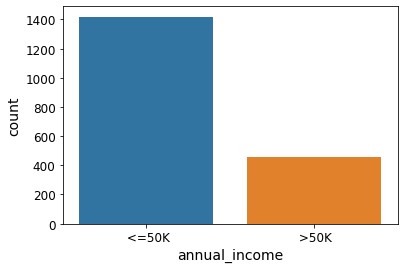

In [111]:
sns.countplot(Final_Data['annual_income'])

# Naïve Bayes classifier

In [112]:
model = GaussianNB()
model.fit(Final_Data_dummies_test, labels);

In [113]:
model = GaussianNB()

scores = cross_val_score(model, Final_Data_dummies_test, labels, cv=10)
scores.mean()

0.7968454886790306

In [114]:
Final_Data.columns = ['age', 'workclass', 
              'education-num', 'marital-status', 'occupation', 
              'relationship', 'race', 'sex', 'capital-gain', 
              'capital-loss', 'hours-per-week',
              'label']

In [115]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split

classifier = NearestCentroid()

In [116]:
classifier.fit(datapoints, labels)

NearestCentroid()

In [117]:
predictions = classifier.predict(datapoints)
predictions

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [118]:
print(datapoints[0])

[62  4  0  0 66  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  1  0  1]


In [119]:
print(classifier.predict([datapoints[0]]))

[0]


In [120]:
classifier.predict([datapoints[0]]) == labels[0]

array([ True])

In [121]:
x = np.asarray(Final_Data_dummies[['age','education_num','capital_gain','education_num','workclass_ Private','workclass_ Self-emp-not-inc',
                      'workclass_ Self-emp-inc','workclass_ Federal-gov','workclass_ Local-gov','workclass_ State-gov',
                      'workclass_ Without-pay','relationship_ Wife','relationship_ Own-child','relationship_ Husband',
                      'relationship_ Not-in-family','relationship_ Other-relative','relationship_ Unmarried','occupation_ Tech-support', 'occupation_ Craft-repair', 
                     'occupation_ Other-service', 'occupation_ Sales', 'occupation_ Exec-managerial',
                     'occupation_ Prof-specialty','occupation_ Handlers-cleaners','occupation_ Machine-op-inspct',
                     'occupation_ Adm-clerical','occupation_ Farming-fishing','occupation_ Transport-moving',
                     'occupation_ Priv-house-serv','occupation_ Protective-serv',"race_ Amer-Indian-Eskimo","race_ Asian-Pac-Islander",
                   "race_ Black","race_ Other","race_ White","sex_ Female","sex_ Male","hours_per week"]])

y = np.array(Final_Data_dummies['annual_income_ <=50K' and 'annual_income_ >50K'])


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=1)
model = GaussianNB()
model.fit(x_test, y_test)

GaussianNB()

In [123]:
scores = cross_val_score(model, x_train, y_train,cv=5)
scores.mean()

0.8089072282299374

In [124]:
predictions = model.predict(x_train)
print((predictions == y_train).mean())

0.8017515923566879


In [125]:
predictions = model.predict(x_test)
print((predictions == y_test).mean())


0.827140549273021


In [126]:
%timeit classifier.fit(x_train, y_train)

predictions_train = classifier.predict(x_train)
predictions_test = classifier.predict(x_test)

acc_train = accuracy_score(y_train, predictions_train)
acc_test = accuracy_score(y_test, predictions_test)

print("Accuracy on training data: ", acc_train)
print("Accuracy on test data: ", acc_test)

489 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Accuracy on training data:  0.7866242038216561
Accuracy on test data:  0.7915993537964459


In [127]:
%time classifier.fit(x_train, y_train)

predictions_train = classifier.predict(x_train)
predictions_test = classifier.predict(x_test)

acc_train = accuracy_score(y_train, predictions_train)
acc_test = accuracy_score(y_test, predictions_test)

print("Accuracy on training data: ", acc_train)
print("Accuracy on test data: ", acc_test)

CPU times: user 2.9 ms, sys: 1.35 ms, total: 4.24 ms
Wall time: 2 ms
Accuracy on training data:  0.7866242038216561
Accuracy on test data:  0.7915993537964459


# Neural network classifier 

<AxesSubplot:>

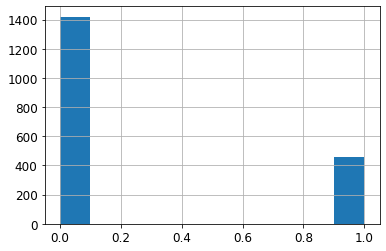

In [131]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Final_Data_dummies['annual_income_ <=50K' and 'annual_income_ >50K'])
Final_Data_dummies['annual_income_test'] = le.transform(Final_Data_dummies['annual_income_ <=50K' and 'annual_income_ >50K'])
Final_Data_dummies['annual_income_test'].hist()

In [132]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

keras.__version__

'2.2.4-tf'

In [133]:
y = keras.utils.to_categorical(Final_Data_dummies['annual_income_ <=50K' and 'annual_income_ >50K'])
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [47]:
X = Final_Data_dummies_test[attributes].values
X

array([[   62,     4,     0, ...,     1,     0,    66],
       [   18,     7,     0, ...,     0,     1,    25],
       [   25,    13, 27828, ...,     0,     1,    50],
       ...,
       [   37,     2,     0, ...,     1,     0,    48],
       [   50,    12,  3942, ...,     1,     0,    40],
       [   58,     9,     0, ...,     0,     1,    50]])

1.56 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Train on 1875 samples
Epoch 1/500
1875/1875 [==============================] - 1s 774us/sample - loss: 0.6391 - accuracy: 0.6629
Epoch 2/500
1875/1875 [==============================] - 0s 88us/sample - loss: 0.5533 - accuracy: 0.7552
Epoch 3/500
1875/1875 [==============================] - 0s 89us/sample - loss: 0.5393 - accuracy: 0.7568
Epoch 4/500
1875/1875 [==============================] - 0s 89us/sample - loss: 0.5345 - accuracy: 0.7568
Epoch 5/500
1875/1875 [==============================] - 0s 80us/sample - loss: 0.5320 - accuracy: 0.7568
Epoch 6/500
1875/1875 [==============================] - 0s 76us/sample - loss: 0.5305 - accuracy: 0.7568
Epoch 7/500
1875/1875 [==============================] - 0s 75us/sample - loss: 0.5295 - accuracy: 0.7568
Epoch 8/500
1875/1875 [==============================] - 0s 79us/sample - loss: 0.5288 - accuracy: 0.7568
Epoch 9/500
1875/1875 [==============================] - 

<function matplotlib.pyplot.show(close=None, block=None)>

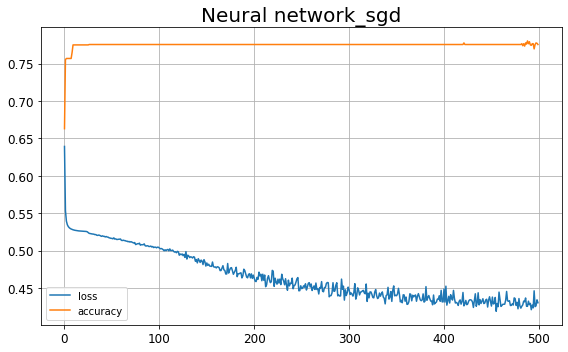

In [48]:
%timeit keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Dense(8, input_dim=len(attributes), activation="sigmoid"))
model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

history = model.fit(X, y, epochs=500, batch_size=32)

pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.title('Neural network_sgd', fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.savefig('sgd', dpi=300)
plt.show

In [49]:
X_valid, X_train = X[:50], X[50:]
y_valid, y_train = y[:50], y[50:]

1.58 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<function matplotlib.pyplot.show(close=None, block=None)>

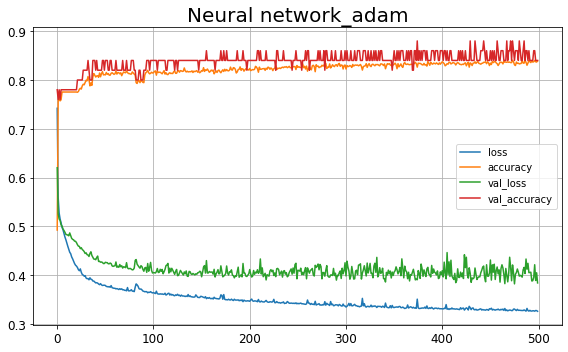

In [50]:
%timeit keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()

model.add(keras.layers.Dense(8, input_dim=len(attributes), activation="sigmoid"))
model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=500, batch_size=32, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.title('Neural network_adam', fontsize=20)


plt.grid(True)
plt.tight_layout()
plt.savefig('adam', dpi=300)
plt.show

In [95]:
eval = model.evaluate(X_train, y_train)
print( 'loss =', eval[0] )
print( 'accuracy =', eval[1] )

1825/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

<AxesSubplot:>

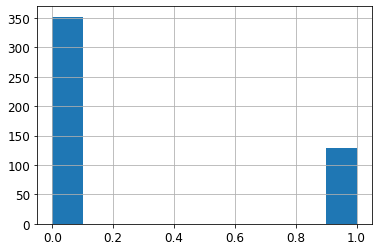

In [88]:
testing = pd.read_csv("adult.csv")
testing_new = Data.sample(n=500,random_state=2)
testing_sample = testing_new.drop(['fnlwgt', 'educatoin','native_country'], axis=1)
Final_testing = testing_sample[~testing_sample['workclass'].isin([" ?"])]
Final_testing = testing_sample[~testing_sample['occupation'].isin([" ?"])]
Final_testing_dummies = pd.get_dummies(Final_testing)
attributes2 = ['age','education_num','capital_gain','education_num','workclass_ Private','workclass_ Self-emp-not-inc',
                      'workclass_ Self-emp-inc','workclass_ Federal-gov','workclass_ Local-gov','workclass_ State-gov',
                      'workclass_ Without-pay','relationship_ Wife','relationship_ Own-child','relationship_ Husband',
                      'relationship_ Not-in-family','relationship_ Other-relative','relationship_ Unmarried','occupation_ Tech-support', 'occupation_ Craft-repair', 
                     'occupation_ Other-service', 'occupation_ Sales', 'occupation_ Exec-managerial',
                     'occupation_ Prof-specialty','occupation_ Handlers-cleaners','occupation_ Machine-op-inspct',
                     'occupation_ Adm-clerical','occupation_ Farming-fishing','occupation_ Transport-moving',
                     'occupation_ Priv-house-serv','occupation_ Protective-serv',"race_ Amer-Indian-Eskimo","race_ Asian-Pac-Islander",
                   "race_ Black","race_ Other","race_ White","sex_ Female","sex_ Male","hours_per week"]

Final_testing_dummies[attributes2]
datapoints2 = Final_testing_dummies.drop('annual_income_ <=50K'and 'annual_income_ >50K', axis=1).values
labels2 = np.array(Final_testing_dummies['annual_income_ <=50K'and 'annual_income_ >50K'])
Final_testing_dummies_test = Final_testing_dummies.drop(['annual_income_ <=50K','annual_income_ >50K'], axis=1)
le = preprocessing.LabelEncoder()
le.fit(Final_testing_dummies['annual_income_ <=50K' and 'annual_income_ >50K'])
Final_testing_dummies['annual_income_test2'] = le.transform(Final_testing_dummies['annual_income_ <=50K' and 'annual_income_ >50K'])
Final_testing_dummies['annual_income_test2'].hist()

In [89]:
Final_testing_dummies['annual_income_test2'] = le.transform(Final_testing_dummies['annual_income_ <=50K' and 'annual_income_ >50K'])
X_testing = Final_testing_dummies[attributes2].values
y_testing = keras.utils.to_categorical(Final_testing_dummies['annual_income_test2'])

model.evaluate(X_testing, y_testing, verbose=0)

[0.419866011540095, 0.8041667]

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 312       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 330
Trainable params: 330
Non-trainable params: 0
_________________________________________________________________


<function matplotlib.pyplot.show(close=None, block=None)>

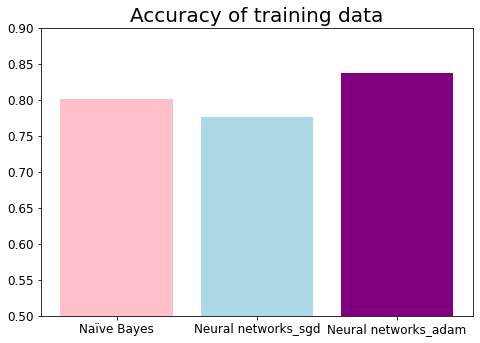

In [181]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
technique  = ['Naïve Bayes', 'Neural networks_sgd', 'Neural networks_adam']

Accuracy = [0.80175,0.7755,0.8373]
plt.title('Accuracy of training data', fontsize=20)
plt.ylim(0.5, 0.9)
ax.bar(technique ,Accuracy)
plt.bar(technique,Accuracy,color=['pink','lightblue','purple'])

plt.savefig('Accuracy of training data', dpi=300, bbox_inches = "tight")
plt.show

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


<function matplotlib.pyplot.show(close=None, block=None)>

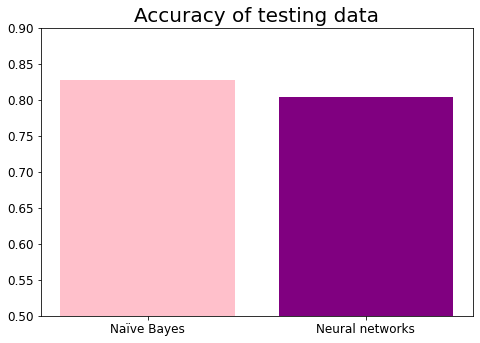

In [180]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
technique2  = ['Naïve Bayes', 'Neural networks']

Accuracy2 = [0.82714,0.80417]
plt.title('Accuracy of testing data', fontsize=20)
plt.ylim(0.5, 0.9)
ax.bar(technique2 ,Accuracy2)
plt.bar(technique2,Accuracy2,color=['pink','purple'])


plt.tight_layout()
plt.savefig('Accuracy of testing data', dpi=300, bbox_inches = "tight")
plt.show

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


<function matplotlib.pyplot.show(close=None, block=None)>

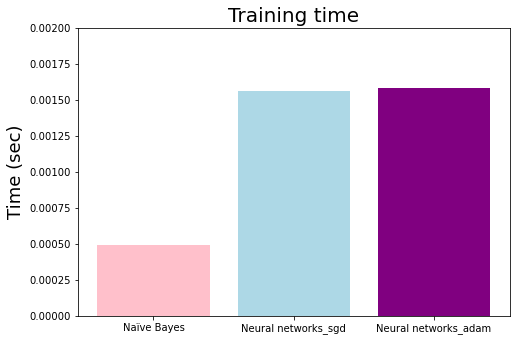

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
technique  = ['Naïve Bayes', 'Neural networks_sgd', 'Neural networks_adam']

Time = [0.000489, 0.00156, 0.00158]
plt.title('Training time', fontsize=20)
plt.ylim(0, 0.002)
plt.ylabel('Time (sec)',fontsize=18)

ax.bar(technique ,Time)
plt.bar(technique,Time,color=['pink','lightblue','purple'])

plt.tight_layout()
plt.savefig('Time of training data', dpi=300, bbox_inches = "tight")
plt.show